In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [3]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.filename

'C:\\Users\\ESHWAR\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [8]:
# Convert datatype to float
df = df.astype(float)

In [9]:
# append "target" and name it "label"
df['label'] = iris.target

In [10]:
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)

In [13]:
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [15]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [16]:
# Convert DataFrame into np array
X = np.asarray(X)

In [17]:
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]

In [18]:
# Convert DataFrame into np array
y = np.asarray(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.20)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [22]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [37]:
X_train

array([[6. , 3. , 4.8, 1.8],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [5.4, 3.4, 1.7, 0.2],
       [7.1, 3. , 5.9, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [5.5, 3.5, 1.3, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [4.6, 3.1, 1.5, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [5.8, 2.6, 4. , 1.2],
       [5. , 2. , 3.5, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.5, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [6.1, 2.9, 4.7, 1.4],
       [7.7, 3.8, 6.7, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6. , 2.2, 5. , 1.5],
       [4.4, 3. , 1.3, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.6, 1.4, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [6.7, 3. , 5. , 1.7],
       [6.7, 2.5, 5.8, 1.8],
       [5. , 3. , 1.6, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [7.7, 3

In [40]:
type(X_train)

numpy.ndarray

In [39]:
y_train

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0,

In [42]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.25,  batch_size=40,  verbose=2 )

Epoch 1/200
3/3 - 0s - loss: 0.1276 - accuracy: 0.9556 - val_loss: 0.0588 - val_accuracy: 0.9667 - 42ms/epoch - 14ms/step
Epoch 2/200
3/3 - 0s - loss: 0.1416 - accuracy: 0.9667 - val_loss: 0.0614 - val_accuracy: 0.9667 - 44ms/epoch - 15ms/step
Epoch 3/200
3/3 - 0s - loss: 0.1012 - accuracy: 0.9444 - val_loss: 0.1041 - val_accuracy: 0.9333 - 44ms/epoch - 15ms/step
Epoch 4/200
3/3 - 0s - loss: 0.2127 - accuracy: 0.9333 - val_loss: 0.0844 - val_accuracy: 0.9667 - 38ms/epoch - 13ms/step
Epoch 5/200
3/3 - 0s - loss: 0.1207 - accuracy: 0.9556 - val_loss: 0.0585 - val_accuracy: 1.0000 - 39ms/epoch - 13ms/step
Epoch 6/200
3/3 - 0s - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.0572 - val_accuracy: 0.9667 - 52ms/epoch - 17ms/step
Epoch 7/200
3/3 - 0s - loss: 0.1385 - accuracy: 0.9778 - val_loss: 0.0593 - val_accuracy: 0.9667 - 54ms/epoch - 18ms/step
Epoch 8/200
3/3 - 0s - loss: 0.1221 - accuracy: 0.9667 - val_loss: 0.0593 - val_accuracy: 0.9667 - 47ms/epoch - 16ms/step
Epoch 9/200
3/3 - 0s - l

Epoch 68/200
3/3 - 0s - loss: 0.0867 - accuracy: 0.9778 - val_loss: 0.0795 - val_accuracy: 1.0000 - 44ms/epoch - 15ms/step
Epoch 69/200
3/3 - 0s - loss: 0.0894 - accuracy: 0.9889 - val_loss: 0.0989 - val_accuracy: 0.9667 - 52ms/epoch - 17ms/step
Epoch 70/200
3/3 - 0s - loss: 0.1325 - accuracy: 0.9556 - val_loss: 0.1623 - val_accuracy: 0.9333 - 37ms/epoch - 12ms/step
Epoch 71/200
3/3 - 0s - loss: 0.0909 - accuracy: 0.9778 - val_loss: 0.2173 - val_accuracy: 0.9333 - 44ms/epoch - 15ms/step
Epoch 72/200
3/3 - 0s - loss: 0.1075 - accuracy: 0.9667 - val_loss: 0.1490 - val_accuracy: 0.9333 - 44ms/epoch - 15ms/step
Epoch 73/200
3/3 - 0s - loss: 0.1416 - accuracy: 0.9444 - val_loss: 0.0874 - val_accuracy: 0.9333 - 38ms/epoch - 13ms/step
Epoch 74/200
3/3 - 0s - loss: 0.0804 - accuracy: 0.9778 - val_loss: 0.0820 - val_accuracy: 0.9667 - 43ms/epoch - 14ms/step
Epoch 75/200
3/3 - 0s - loss: 0.1490 - accuracy: 0.9444 - val_loss: 0.0756 - val_accuracy: 0.9667 - 40ms/epoch - 13ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.1123 - accuracy: 0.9556 - val_loss: 0.0704 - val_accuracy: 0.9667 - 45ms/epoch - 15ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0720 - accuracy: 0.9778 - val_loss: 0.0675 - val_accuracy: 0.9667 - 49ms/epoch - 16ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0715 - accuracy: 0.9778 - val_loss: 0.0682 - val_accuracy: 0.9667 - 40ms/epoch - 13ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0616 - accuracy: 0.9778 - val_loss: 0.0686 - val_accuracy: 0.9667 - 30ms/epoch - 10ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0714 - accuracy: 0.9889 - val_loss: 0.0673 - val_accuracy: 0.9667 - 45ms/epoch - 15ms/step
Epoch 140/200
3/3 - 0s - loss: 0.1002 - accuracy: 0.9778 - val_loss: 0.0650 - val_accuracy: 0.9667 - 46ms/epoch - 15ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0645 - accuracy: 0.9889 - val_loss: 0.0663 - val_accuracy: 0.9667 - 50ms/epoch - 17ms/step
Epoch 142/200
3/3 - 0s - loss: 0.1366 - accuracy: 0.9667 - val_loss: 0.0678 - val_accuracy: 0.9667 - 47ms/epoch - 16ms/step
Epoch 14

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

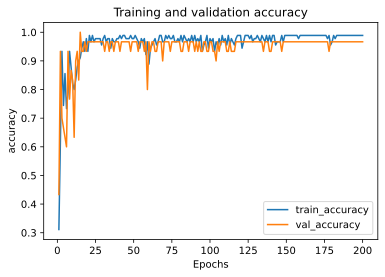

In [26]:
plot_metric(history, 'accuracy')

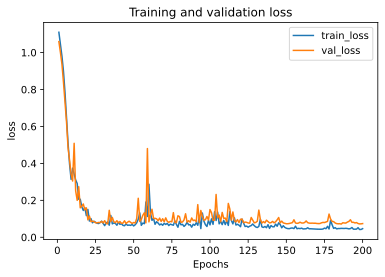

In [27]:
plot_metric(history, 'loss')

In [28]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0771 - accuracy: 0.9667 - 23ms/epoch - 23ms/step


[0.07705305516719818, 0.9666666388511658]

In [29]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [30]:
def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [31]:
model = create_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [32]:
# First configure model using model.compile()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Then, train the model with fit()
history = model.fit(X_train, y_train, epochs=200, validation_split=0.25, batch_size=40, verbose=2)

Epoch 1/200
3/3 - 1s - loss: 1.1475 - accuracy: 0.3556 - val_loss: 1.1106 - val_accuracy: 0.4333 - 1s/epoch - 382ms/step
Epoch 2/200
3/3 - 0s - loss: 1.1119 - accuracy: 0.4444 - val_loss: 1.0950 - val_accuracy: 0.3333 - 56ms/epoch - 19ms/step
Epoch 3/200
3/3 - 0s - loss: 1.1978 - accuracy: 0.2778 - val_loss: 1.0857 - val_accuracy: 0.5667 - 51ms/epoch - 17ms/step
Epoch 4/200
3/3 - 0s - loss: 1.1008 - accuracy: 0.3889 - val_loss: 1.0813 - val_accuracy: 0.5333 - 48ms/epoch - 16ms/step
Epoch 5/200
3/3 - 0s - loss: 1.1474 - accuracy: 0.2000 - val_loss: 1.0809 - val_accuracy: 0.5667 - 42ms/epoch - 14ms/step
Epoch 6/200
3/3 - 0s - loss: 1.0781 - accuracy: 0.3667 - val_loss: 1.0780 - val_accuracy: 0.3000 - 37ms/epoch - 12ms/step
Epoch 7/200
3/3 - 0s - loss: 1.1262 - accuracy: 0.3667 - val_loss: 1.0751 - val_accuracy: 0.3000 - 37ms/epoch - 12ms/step
Epoch 8/200
3/3 - 0s - loss: 1.0998 - accuracy: 0.3444 - val_loss: 1.0726 - val_accuracy: 0.3000 - 41ms/epoch - 14ms/step
Epoch 9/200
3/3 - 0s - lo

Epoch 68/200
3/3 - 0s - loss: 0.4759 - accuracy: 0.7444 - val_loss: 0.4984 - val_accuracy: 0.5667 - 50ms/epoch - 17ms/step
Epoch 69/200
3/3 - 0s - loss: 0.4693 - accuracy: 0.7111 - val_loss: 0.4991 - val_accuracy: 0.5667 - 36ms/epoch - 12ms/step
Epoch 70/200
3/3 - 0s - loss: 0.4898 - accuracy: 0.7333 - val_loss: 0.4929 - val_accuracy: 0.6000 - 38ms/epoch - 13ms/step
Epoch 71/200
3/3 - 0s - loss: 0.4758 - accuracy: 0.6889 - val_loss: 0.4875 - val_accuracy: 0.6000 - 54ms/epoch - 18ms/step
Epoch 72/200
3/3 - 0s - loss: 0.5051 - accuracy: 0.6889 - val_loss: 0.4829 - val_accuracy: 0.7000 - 47ms/epoch - 16ms/step
Epoch 73/200
3/3 - 0s - loss: 0.4682 - accuracy: 0.7222 - val_loss: 0.4802 - val_accuracy: 0.8000 - 38ms/epoch - 13ms/step
Epoch 74/200
3/3 - 0s - loss: 0.4402 - accuracy: 0.7667 - val_loss: 0.4780 - val_accuracy: 0.8000 - 36ms/epoch - 12ms/step
Epoch 75/200
3/3 - 0s - loss: 0.4868 - accuracy: 0.7556 - val_loss: 0.4803 - val_accuracy: 0.6000 - 35ms/epoch - 12ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.2728 - accuracy: 0.9333 - val_loss: 0.2937 - val_accuracy: 1.0000 - 36ms/epoch - 12ms/step
Epoch 136/200
3/3 - 0s - loss: 0.3359 - accuracy: 0.9000 - val_loss: 0.2883 - val_accuracy: 1.0000 - 34ms/epoch - 11ms/step
Epoch 137/200
3/3 - 0s - loss: 0.2998 - accuracy: 0.8778 - val_loss: 0.2979 - val_accuracy: 0.9333 - 37ms/epoch - 12ms/step
Epoch 138/200
3/3 - 0s - loss: 0.3442 - accuracy: 0.8889 - val_loss: 0.2946 - val_accuracy: 0.9333 - 36ms/epoch - 12ms/step
Epoch 139/200
3/3 - 0s - loss: 0.3186 - accuracy: 0.9000 - val_loss: 0.2586 - val_accuracy: 0.9667 - 40ms/epoch - 13ms/step
Epoch 140/200
3/3 - 0s - loss: 0.3152 - accuracy: 0.9111 - val_loss: 0.2322 - val_accuracy: 1.0000 - 54ms/epoch - 18ms/step
Epoch 141/200
3/3 - 0s - loss: 0.3573 - accuracy: 0.8667 - val_loss: 0.2739 - val_accuracy: 0.9333 - 62ms/epoch - 21ms/step
Epoch 142/200
3/3 - 0s - loss: 0.2894 - accuracy: 0.8889 - val_loss: 0.2861 - val_accuracy: 0.9000 - 52ms/epoch - 17ms/step
Epoch 14

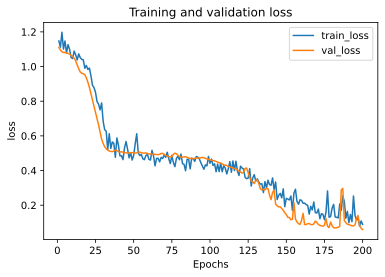

In [34]:
plot_metric(history, 'loss')

In [35]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0699 - accuracy: 0.9667 - 19ms/epoch - 19ms/step


[0.06993638724088669, 0.9666666388511658]